<a href="https://colab.research.google.com/github/Max-JI64/Today-I-Learn/blob/main/Study/Image_Processing_Bible/1_2_%EA%B8%B0%EB%B3%B8_%EA%B0%9C%EB%85%90%EA%B3%BC_%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2.2 OpenCV

인텔에서 개발한 이미지 처리 오픈소스 라이브러리  
가장 널리 사용됨

## 이미지 입출력

In [ ]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png -O like_lenna.png

--2025-10-27 05:27:28--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30283 (30K) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]  29.57K  --.-KB/s    in 0.004s  

2025-10-27 05:27:28 (8.23 MB/s) - ‘like_lenna.png’ saved [30283/30283]



이미지를 넘파이로 불러오기

In [ ]:
import cv2

image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)

if image is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(image)}")


이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


코랩에서는 OpenCV의 cv2.imshow함수를 사용할 수 없다

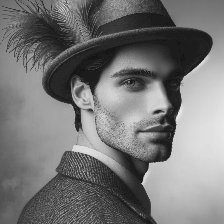

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
print(image.shape)

(224, 224)


## 이미지 변환

### 1) 사이즈 변환

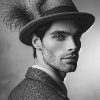

In [ ]:
image_small = cv2.resize(image, dsize=(100, 100))
cv2_imshow(image_small)

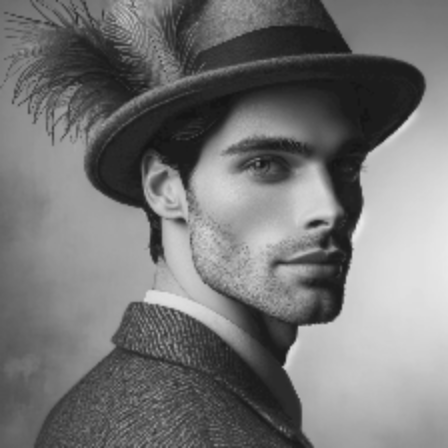

In [ ]:
image_big = cv2.resize(image, dsize = None, fx=2, fy=2) #가로, 새로 두배
cv2_imshow(image_big)

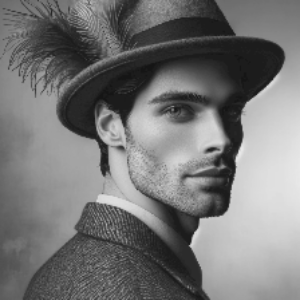

In [ ]:
# 이미지 사이즈 원래대로 돌리기

import numpy as np
new_height = 300
new_width = 300
dst = np.zeros((new_height, new_width), dtype=np.uint8)
cv2.resize(image, (new_width, new_height), dst=dst)
cv2_imshow(dst)

### 2) 대칭 변환

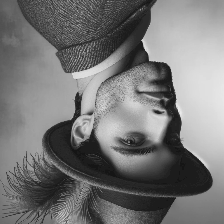

In [ ]:
image_fliped = cv2.flip(image, 0)
cv2_imshow(image_fliped)

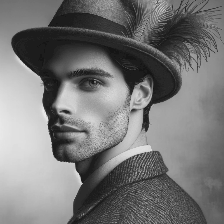

In [ ]:
image_fliped = cv2.flip(image, 1)
cv2_imshow(image_fliped)

### 3) 회전 변환

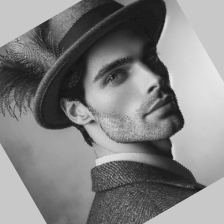

In [ ]:
height, width = image.shape
matrix = cv2.getRotationMatrix2D(center = (width/2, height/2), angle=30, scale=1) #회전 중심, 회전 각도, 확대
result = cv2.warpAffine(image, matrix, dsize=(width, height), borderValue=200) #가장자리 빈칸 색 추가
cv2_imshow(result)

### 자르기

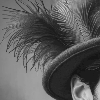

In [ ]:
cv2_imshow(image[:100, :100])

numpy 슬라이싱은 원본 객체의 값을 그대로 참조

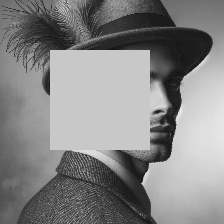

In [ ]:
croped_image = image[50:150, 50:150]
croped_image[:] = 200
cv2_imshow(image)

## 도형 그리기

### 선

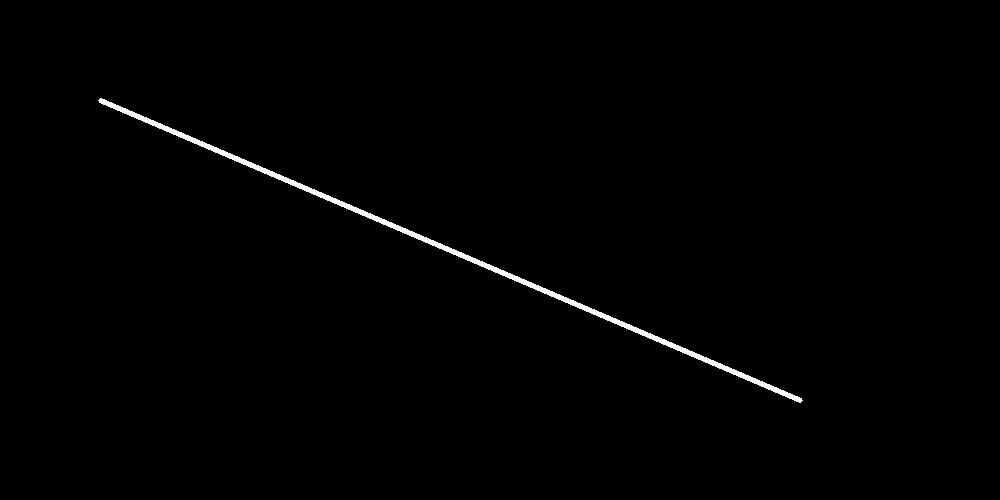

In [ ]:
space = np.zeros((500, 1000), dtype=np.uint8)
line_color = 255
space = cv2.line(space, (100, 100), (800, 400), line_color, 3, 1)

cv2_imshow(space)

### 원

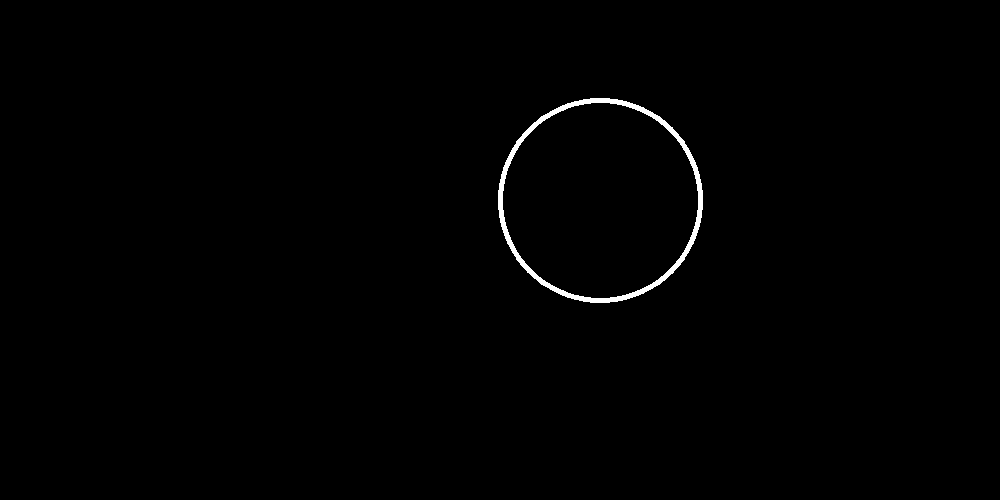

In [ ]:
space = np.zeros((500, 1000), dtype=np.uint8)
color = 255
space = cv2.circle(space, (600, 200), 100, color, 4, 1)

cv2_imshow(space)

### 직사각형

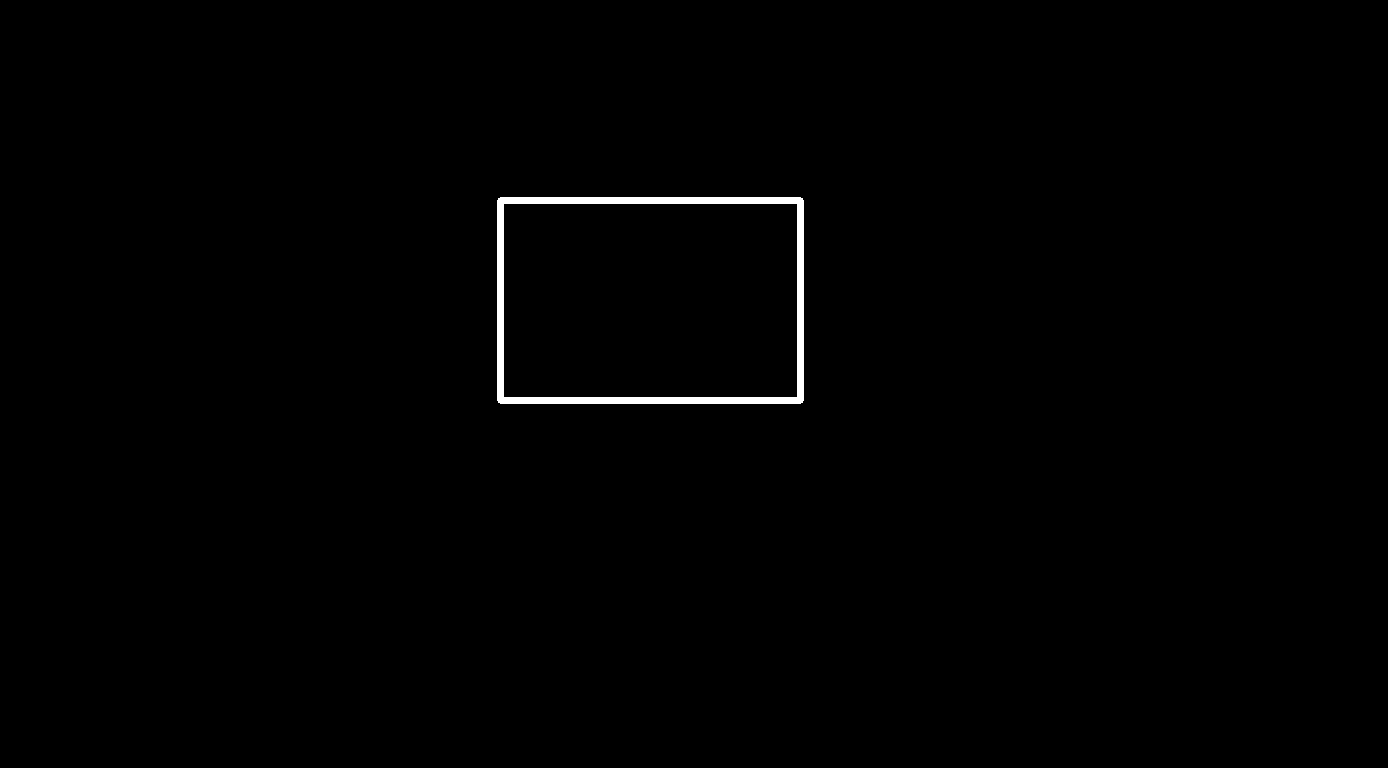

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
space = cv2.rectangle(space, (500, 200), (800, 400), color, 5, 1)

cv2_imshow(space)

### 타원

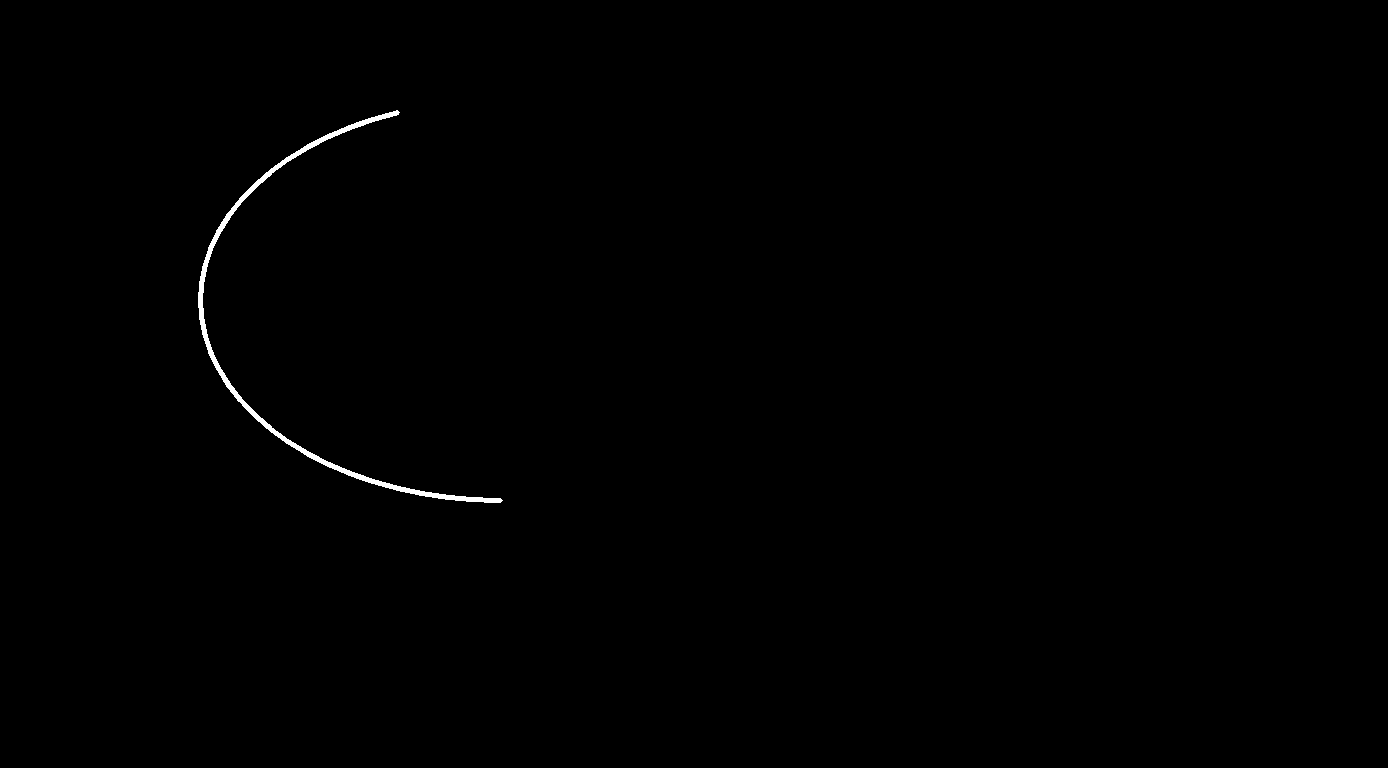

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
space = cv2.ellipse(space, (500, 300), (300, 200), 0, 90, 250, color, 4)

cv2_imshow(space)

### 다각형

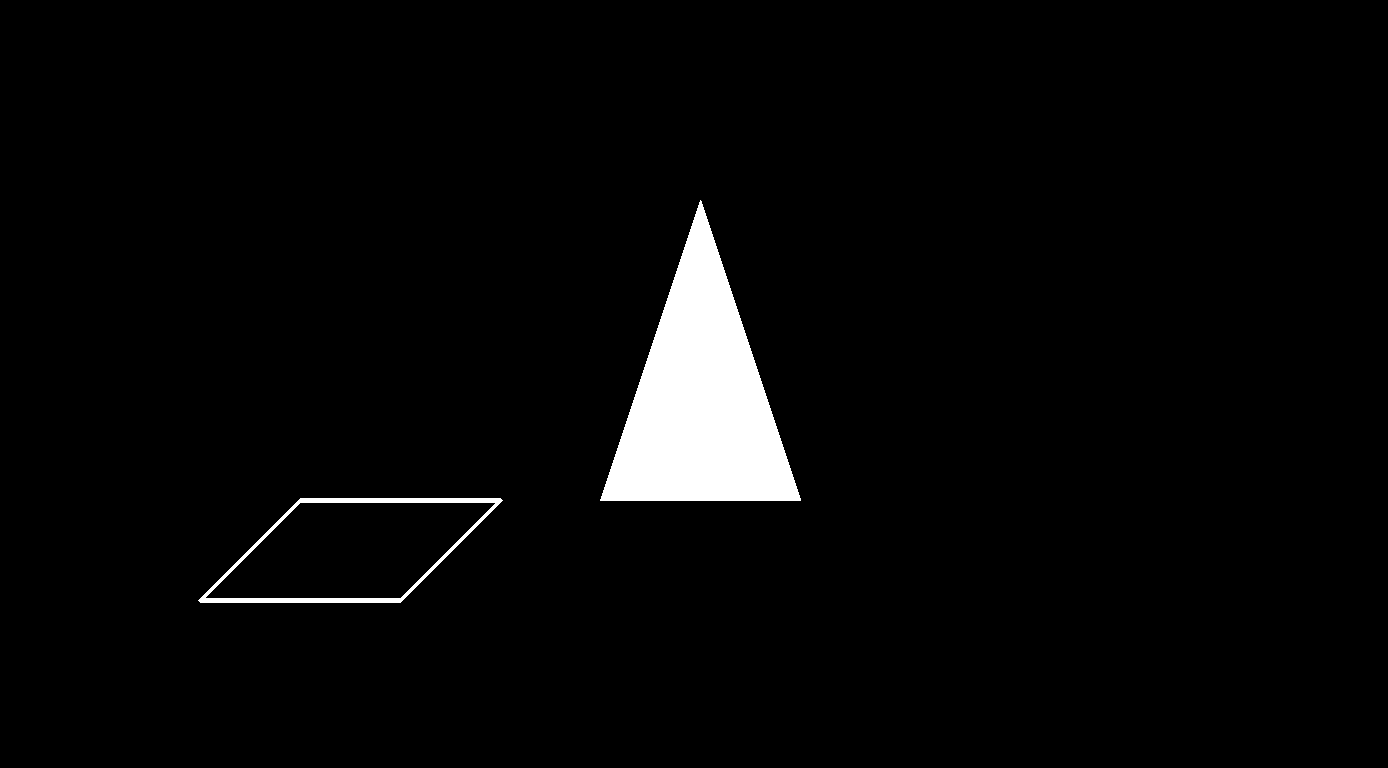

In [ ]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
obj1 = np.array([[300, 500], [500, 500], [400, 600], [200, 600]])
obj2 = np.array([[600, 500], [800, 500], [700, 200]])
space = cv2.polylines(space, [obj1], True, color, 3)
space = cv2.fillPoly(space, [obj2], color, 1)

cv2_imshow(space)

# 1.2.3 테